    Twitter Data Fetch Using API

###### Open Powershell using Admin Privilleges

    python -m pip install tweepy

In [1]:
!python -m pip install tweepy #download package

In [2]:
from tweepy import OAuthHandler, Stream, StreamListener # use twitter package

In [3]:
print(dir(StreamListener))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'keep_alive', 'on_connect', 'on_data', 'on_delete', 'on_direct_message', 'on_disconnect', 'on_error', 'on_event', 'on_exception', 'on_friends', 'on_limit', 'on_scrub_geo', 'on_status', 'on_status_withheld', 'on_timeout', 'on_user_withheld', 'on_warning']


In [4]:
class DataFetch(StreamListener):
    def on_data(self, tweet):
        #print(tweet)
        fp = open("tweets.txt", "a")
        fp.write(tweet)
        fp.write("\n")
        fp.close()
    def on_error(self, err_msg):
        print(f"!!Error!! {err_msg}")

In [5]:
api_key = "ziF1UgwIUd6cI6HDWp20rjihD"
api_secret = "Nmpbg9y5YlrkIkCF9TvLeA083dNOfg2S5Jy5XSaCALhQEHk1qh"

access_token = "1034315062088003584-LWXMQPjqV2hrpPYiMJ74VEc8QM2Qtt"
access_secret = "xpSLfl9U6IJzPUpwEJusfEk8ncyY7tj0l2oOxghHfLx6H"

auth = OAuthHandler(api_key, api_secret)

auth.set_access_token(access_token, access_secret)

In [6]:
fetch_tweet = DataFetch()

In [7]:
tweets = Stream(auth, fetch_tweet)

**ETL**

In [8]:
# Extraction
tweets.filter(track=['corona', 'modi', 'india' ]) # WantReadError because too much data related to Modi , Corona and india is there on twitter

KeyboardInterrupt: 

__Analysis Steps__

In [9]:
# Etract (raw_facts)

# Tansform (inforamation)

# Load  (data structures or fiels or database)

    pypi.org

    python package index

In [28]:
fp = open('tweets.txt')
data = fp.readline()
fp.close()

In [29]:
print(type(data))

<class 'str'>


In [31]:
import json

In [32]:
data = json.loads(data)

In [33]:
print(type(data))

<class 'dict'>


In [35]:
print(*data.keys(), sep='\n')

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms


In [36]:
data['text']

'RT @sidharth_shukla: Not a lot out there... not much to do .. just hoping all’s fine with you ... take care of yourself n family too ....an…'

In [38]:
data['place']# ?

In [39]:
data['lang']

'en'

In [40]:
data['retweet_count']

0

In [4]:
# Transformation
import numpy as np
import json
place = []
tweet = []
lang = []
hash_tags = []
with open('tweets.txt') as fp:
    for line in fp:
        try:
            d = json.loads(line)
            tweet.append(d['text'])
            if not d['place']:
                place.append(np.nan)
            else:
                place.append(d['place']['country'])
            lang.append(d['lang'])
            data = d['text'].split()
            for word in data:
                if word.startswith('#'):
                    hash_tags.append(word.lower().strip())
        except Exception as e:
            #print(e)
            pass
    fp.close()
    

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['xtick.color'] = 'red'


In [7]:
len(tweet) # Length of tweets

1786

In [8]:
len(lang)

1786

In [9]:
len(place)

1786

In [10]:
df = pd.DataFrame({
    'tweet': tweet,
    'lang': lang,
    'country': place
})

In [11]:
df.shape

(1786, 3)

In [12]:
df.head()

,tweet,lang,country
0,RT @sidharth_shukla: Not a lot out there... no...,en,NaN
1,RT @EmaduddinS: Theses Peoples Are Not The Voi...,en,NaN
2,मुम्बई में रहने वाले मधुबनी के युवक की कोरोना ...,hi,NaN
3,@ishkarnBHANDARI Total Chinese Investment in I...,en,NaN
4,RT @gm2011744: A prominent leader in the India...,en,NaN


In [15]:
df.to_csv('tweets.csv') # Load

In [14]:
plt.rcParams['figure.figsize'] = 12,6

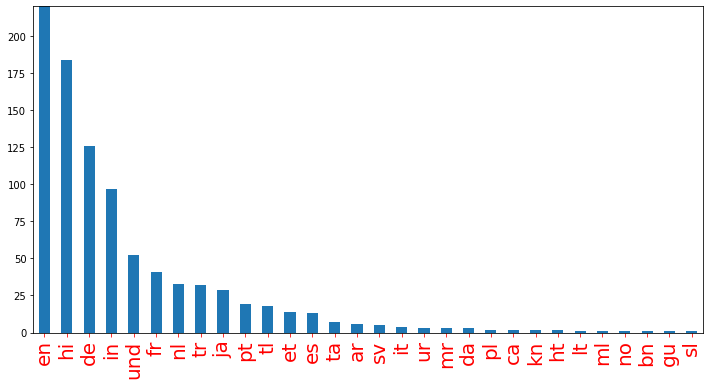

In [16]:
df['lang'].value_counts().plot(kind='bar')
plt.ylim([0, 220])
plt.show()

In [17]:
len(hash_tags)

875

In [18]:
s = pd.Series(hash_tags)

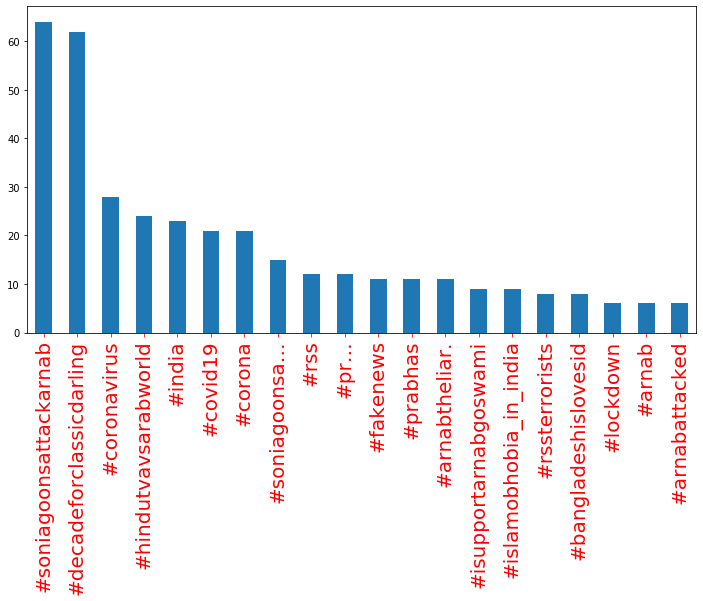

In [21]:
s.value_counts()[:20].plot(kind='bar')
plt.show()

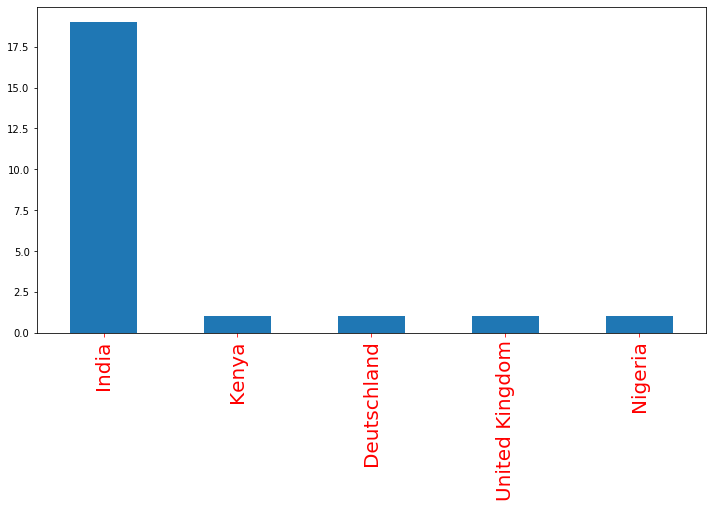

In [24]:
df['country'].value_counts().plot(kind='bar')
plt.show()

In [25]:
df['tweet']

0       RT @sidharth_shukla: Not a lot out there... no...
1       RT @EmaduddinS: Theses Peoples Are Not The Voi...
2       मुम्बई में रहने वाले मधुबनी के युवक की कोरोना ...
3       @ishkarnBHANDARI Total Chinese Investment in I...
4       RT @gm2011744: A prominent leader in the India...
                              ...                        
1781    प्यार ❤️\n\n#canon5dmarkiv #ronin #gimbal #del...
1782    RT @Thisisprabha: presenting u the pan india s...
1783    RT @VikasSaraswat: "Arundhati Roy knows Hindus...
1784    RT @GlamLifeGuru: Super curious - anyone havin...
1785    RT @QuirinWeber: "Menschenopfer für den Kapita...
Name: tweet, Length: 1786, dtype: object

In [28]:
tweets_en = []
tweets_hi = []
fp = open('tweets.txt')
for line in fp:
    try:
        d = json.loads(line)
        if d['lang'] == 'en':
            tweets_en.append(d['text'])
        elif d['lang'] == 'hi':
            tweets_hi.append(d['text'])
    except:
        pass
fp.close()

In [30]:
tweets_hi

['मुम्बई में रहने वाले मधुबनी के युवक की कोरोना वायरस से मौत, गांव में हड़कंप \nhttps://t.co/tshhFlIgGK',
 '@INCIndia Soniya ji  modi ko English bolna sikho jab online ate dehati language me speech dete hai...',
 'RT @AtwalBheem: 5 चारों आेर कोरोना का साय़ा हैं\nईसीलिय हमने आपके लिय बनाया है.. #FeverDetectionCamera  एक सरल व आसान उपाय...sparsh ...make…',
 'RT @PiyushGoyal: कोरोना के विरुद्ध लड़ाई में PM @NarendraModi जी की दूरदर्शिता, तुरंत एक्शन लेने की क्षमता, व असाधारण नेतृत्व के कारण उ…',
 'RT @lokarlorajniti: सूट-बूट में समस्या हो तो राहुल लंगोट में गांठ बांध इंडिया गेट के सामने आएं: शि\u200dवसेना\n#IsupportArnabGoswami https://t.co…',
 'RT @ek_aalu_bonda: सूट बूट से समस्या है तो राहुल गांधी लंगोट में गांठ बांधकर इंडिया गेट के सामने आये- शिवसेना\n\nhttps://t.co/0YPHqqSewy',
 'RT @ABPNews: बिल गेट्स ने पत्र लिखकर पीएम मोदी द्वारा गए कोरोना के खिलाफ लड़ाई में उठाए गए कदमों की सराहना की है.\n\n#BillGates \n#Narendermod…',
 'RT @dazzlepn: झूठा #Arnab \n\n2002 मे कहा #Modi \n ने उस्पे 

### NLP

    nltk


tweet --> tokens (words)

stop_words removal

word count 



In [33]:
from nltk.corpus import stopwords

In [36]:
st = stopwords.words('english')

In [37]:
words = [ word for word in line.split() if word.lower() not in st for line in tweets_en]

In [38]:
words

[]

In [46]:
import string

In [47]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
words = []
for line in tweets_en:
    for word in line.split():
        if word.lower() not in st:
            words.append(word.lower())

In [48]:
s = pd.Series(words)

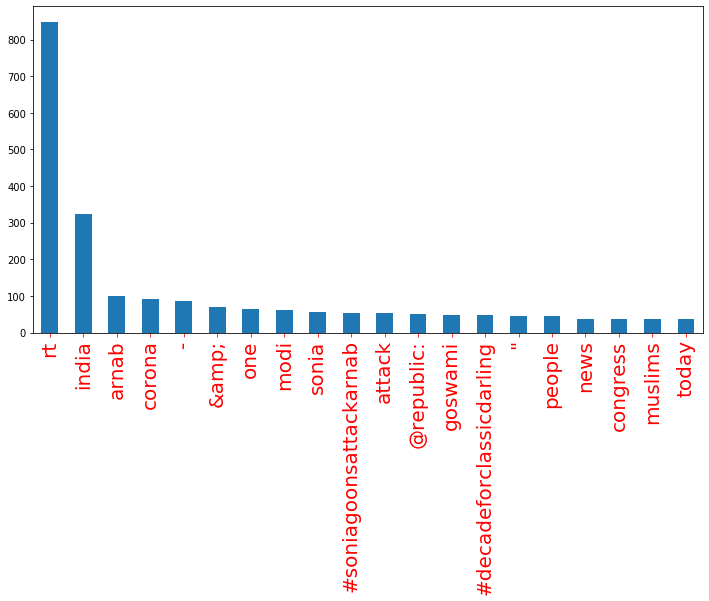

In [53]:
s.value_counts()[:20].plot(kind='bar')
plt.show()

__Other way to use this Data__

Regular Expression

Machine Learning